In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
gdp_df=pd.read_csv('../data/gdp_per_capita.csv')

pd.set_option('display.max_rows', None) #this codes shows us all the rows in the data

Take a look at the first 10 rows.

In [3]:
gdp_df.head(10)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,2065.036398,NaN
1,Afghanistan,2018,2033.779002,NaN
2,Afghanistan,2017,2058.383832,NaN
3,Afghanistan,2016,2057.062164,NaN
4,Afghanistan,2015,2068.265904,NaN
5,Afghanistan,2014,2102.385234,NaN
6,Afghanistan,2013,2116.465454,NaN
7,Afghanistan,2012,2075.491747,NaN
8,Afghanistan,2011,1904.559799,NaN
9,Afghanistan,2010,1957.029338,NaN


Take a look at the first 5 rows. Do you see a problem?

In [4]:
gdp_df.head(5)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,2065.036398,NaN
1,Afghanistan,2018,2033.779002,NaN
2,Afghanistan,2017,2058.383832,NaN
3,Afghanistan,2016,2057.062164,NaN
4,Afghanistan,2015,2068.265904,NaN


In [5]:
gdp_df.tail(5)

,Country or Area,Year,Value,Value Footnotes
6865,Zimbabwe,1992,3054.889178,NaN
6866,Zimbabwe,1991,3426.598094,NaN
6867,Zimbabwe,1990,3324.348171,NaN
6868,footnoteSeqID,Footnote,NaN,NaN
6869,2,"Excludes South Sudan after July 9, 2011.",NaN,NaN


5. Redo the read_csv() call to correct this issue - do not modify the original csv file.

In [6]:
gdp_df=pd.read_csv('../data/gdp_per_capita.csv', skipfooter=2, engine='python') 

In [7]:
gdp_df.tail(5)

,Country or Area,Year,Value,Value Footnotes
6863,Zimbabwe,1994,3263.934978,NaN
6864,Zimbabwe,1993,3033.504852,NaN
6865,Zimbabwe,1992,3054.889178,NaN
6866,Zimbabwe,1991,3426.598094,NaN
6867,Zimbabwe,1990,3324.348171,NaN


6. Drop the 'Value Footnotes' column, and rename the remaining columns to ‘Country’, ‘Year’, and ‘GDP_Per_Capita’.

In [8]:
gdp_df=gdp_df.drop(columns=['Value Footnotes'])

In [9]:
gdp_df

,Country or Area,Year,Value
0,Afghanistan,2019,2065.036398
1,Afghanistan,2018,2033.779002
2,Afghanistan,2017,2058.383832
3,Afghanistan,2016,2057.062164
4,Afghanistan,2015,2068.265904
...,...,...,...
6863,Zimbabwe,1994,3263.934978
6864,Zimbabwe,1993,3033.504852
6865,Zimbabwe,1992,3054.889178
6866,Zimbabwe,1991,3426.598094


In [10]:
gdp_df=gdp_df.rename (columns={'Country or Area': 'Country','Value': 'GDP_Per_Capita'})

In [11]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2019,2065.036398
1,Afghanistan,2018,2033.779002
2,Afghanistan,2017,2058.383832
3,Afghanistan,2016,2057.062164
4,Afghanistan,2015,2068.265904
...,...,...,...
6863,Zimbabwe,1994,3263.934978
6864,Zimbabwe,1993,3033.504852
6865,Zimbabwe,1992,3054.889178
6866,Zimbabwe,1991,3426.598094


7. How many rows and columns does gdp_df have? What are the data types of its columns? If any of the columns are not the expected types, figure out why and fix it.

In [12]:
gdp_df.info() #3 columns and 6868 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6868 entries, 0 to 6867
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         6868 non-null   object 
 1   Year            6868 non-null   int64  
 2   GDP_Per_Capita  6868 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 161.1+ KB


8. Which years are represented in this dataset? Take a look at the number of observations per year. What do you notice?

In [13]:
gdp_df['Year'].value_counts()

2013    238
2014    238
2016    238
2015    238
2017    238
2012    237
2018    237
2011    237
2009    236
2010    236
2007    235
2008    235
2006    235
2004    234
2005    234
2002    233
2003    233
2001    232
2019    231
2000    231
1999    224
1998    223
1997    223
1996    221
1995    221
1994    214
1993    212
1992    209
1991    208
1990    207
Name: Year, dtype: int64

9. How many countries are represented in this dataset? Which countries are least represented in the dataset? Why do you think these countries have so few observations?

In [14]:
gdp_df['Country'].value_counts()

Cameroon                                         30
Europe & Central Asia (excluding high income)    30
Colombia                                         30
Madagascar                                       30
Zimbabwe                                         30
                                                 ..
Nauru                                            16
Cayman Islands                                   13
Sint Maarten (Dutch part)                        10
Turks and Caicos Islands                          9
Djibouti                                          7
Name: Country, Length: 238, dtype: int64

# Question: how can we expand the data in the above data set?

In [15]:
gdp_df['Country'].value_counts().sum() #number of countries 

6868

10. Create a new dataframe by subsetting gdp_df to just the year 2014. Call this new dataframe gdp_2014.

In [16]:
[gdp_df['Year']== 2014]

[0       False
 1       False
 2       False
 3       False
 4       False
         ...  
 6863    False
 6864    False
 6865    False
 6866    False
 6867    False
 Name: Year, Length: 6868, dtype: bool]

In [17]:
gdp_2014= gdp_df[gdp_df['Year'].isin([2014])]

In [18]:
gdp_2014

,Country,Year,GDP_Per_Capita
5,Afghanistan,2014,2102.385234
23,Albania,2014,11623.866679
53,Algeria,2014,11512.705405
83,Angola,2014,8239.828837
113,Antigua and Barbuda,2014,18104.241470
...,...,...,...
6727,Vietnam,2014,6098.489609
6757,West Bank and Gaza,2014,5967.073437
6783,World,2014,15189.648507
6813,Zambia,2014,3450.046561


11.Use .describe() to find the summary statistics for GDP per capita in 2014.

In [19]:
gdp_2014['GDP_Per_Capita'].describe()

count       238.000000
mean      19766.710348
std       20983.869623
min         822.610458
25%        4753.110934
50%       12209.385755
75%       26803.610474
max      156514.133850
Name: GDP_Per_Capita, dtype: float64

12. Create a histogram of GDP Per Capita numbers for 2014 (you may wish to adjust the number of bins for your histogram). How would you describe the shape of the distribution?

<AxesSubplot:>

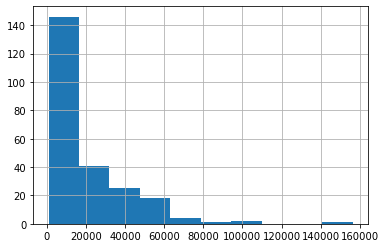

In [20]:
gdp_2014.GDP_Per_Capita.hist(bins=10) #it's right skewed with the mean GDP of less than 20,000.

13. Find the top 5 counties and bottom 5 countries by GDP per capita in 2014.

In [21]:
gdp_2014.nsmallest(5, 'GDP_Per_Capita')

,Country,Year,GDP_Per_Capita
1047,Central African Republic,2014,822.610458
827,Burundi,2014,886.235777
3781,Malawi,2014,1027.208496
1422,Dem. Rep. Congo,2014,1029.790785
4528,Niger,2014,1127.615541


In [22]:
gdp_2014.sort_values(('GDP_Per_Capita'), ascending=True).head() #this code gives us the same result as the previous code

,Country,Year,GDP_Per_Capita
1047,Central African Republic,2014,822.610458
827,Burundi,2014,886.235777
3781,Malawi,2014,1027.208496
1422,Dem. Rep. Congo,2014,1029.790785
4528,Niger,2014,1127.615541


In [23]:
gdp_2014.nlargest(5, 'GDP_Per_Capita')

,Country,Year,GDP_Per_Capita
3721,"Macao SAR, China",2014,156514.133850
3691,Luxembourg,2014,108760.916030
5138,Qatar,2014,95578.416973
5464,Singapore,2014,87808.663157
561,Bermuda,2014,77361.104881


In [24]:
gdp_2014.sort_values(('GDP_Per_Capita'), ascending=False).head() #this code gives us the same thing as the previous code

,Country,Year,GDP_Per_Capita
3721,"Macao SAR, China",2014,156514.133850
3691,Luxembourg,2014,108760.916030
5138,Qatar,2014,95578.416973
5464,Singapore,2014,87808.663157
561,Bermuda,2014,77361.104881


14. Now, return to the full dataset, gdp_df. Pivot the data for 1990 and 2017 (using the pandas .pivot_table() method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. Drop any rows that are missing values for either 1990 or 2017. Save the result to a dataframe named gdp_pivoted.

In [25]:
gdp_df.groupby('Country')['GDP_Per_Capita'].sum() #or count()

Country
Afghanistan             31370.759990
Albania                243697.726643
Algeria                296859.296262
Angola                 184633.368439
Antigua and Barbuda    550790.829206
                           ...      
Vietnam                124452.469775
West Bank and Gaza     131409.278592
World                  377403.999924
Zambia                  77763.624911
Zimbabwe                87884.032159
Name: GDP_Per_Capita, Length: 238, dtype: float64

In [26]:
gdp_df[gdp_df['Year'].isin([1990, 2017])]

,Country,Year,GDP_Per_Capita
2,Afghanistan,2017,2058.383832
20,Albania,2017,12811.759436
47,Albania,1990,4842.734635
50,Algeria,2017,11737.409353
77,Algeria,1990,8746.352901
...,...,...,...
6807,World,1990,9680.269697
6810,Zambia,2017,3485.005238
6837,Zambia,1990,2190.182814
6840,Zimbabwe,2017,3028.245976


In [27]:
gdp_pivoted= pd.pivot_table(gdp_df[gdp_df['Year'].isin([1990, 2017])], 
                            values=['GDP_Per_Capita'], 
                            index=['Country'], 
                            columns=['Year'], dropna=True).dropna(0)

In [28]:
gdp_pivoted

GDP_Per_Capita              
Year                          1990          2017
Country                                         
Albania                4842.734635  12811.759436
Algeria                8746.352901  11737.409353
Angola                 5783.429064   7310.901738
Antigua and Barbuda   15459.551675  19840.076123
Arab World             9694.667544  14555.474921
...                            ...           ...
Vanuatu                2888.309393   3116.645194
Vietnam                1673.249634   7155.745829
World                  9680.269697  16253.385518
Zambia                 2190.182814   3485.005238
Zimbabwe               3324.348171   3028.245976

[207 rows x 2 columns]

15. Create a new column in gdp_pivoted named Percent_Change. This column should contain the percent change in GDP_Per_Capita from 1990 to 2017. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.

In [29]:
gdp_pivoted = gdp_df[(gdp_df['Year'] == 2017) | (gdp_df['Year'] == 1990)].pivot_table('GDP_Per_Capita', index='Country', columns='Year').dropna(0)

In [30]:
gdp_pivoted

Year,1990,2017
Country,,
Albania,4842.734635,12811.759436
Algeria,8746.352901,11737.409353
Angola,5783.429064,7310.901738
Antigua and Barbuda,15459.551675,19840.076123
Arab World,9694.667544,14555.474921
...,...,...
Vanuatu,2888.309393,3116.645194
Vietnam,1673.249634,7155.745829
World,9680.269697,16253.385518


In [31]:
gdp_pivoted['Percent Change'] = (gdp_pivoted.loc[:,2017] - gdp_pivoted.loc[:,1990]) / gdp_pivoted.loc[:,1990]

In [32]:
gdp_pivoted

Year,1990,2017,Percent Change
Country,,,
Albania,4842.734635,12811.759436,1.645563
Algeria,8746.352901,11737.409353,0.341978
Angola,5783.429064,7310.901738,0.264112
Antigua and Barbuda,15459.551675,19840.076123,0.283354
Arab World,9694.667544,14555.474921,0.501390
...,...,...,...
Vanuatu,2888.309393,3116.645194,0.079055
Vietnam,1673.249634,7155.745829,3.276556
World,9680.269697,16253.385518,0.679022


16. How many countries experienced a negative percent change in GDP per capita from 1990 to 2017?

In [33]:
gdp_pivoted['Percent Change'].nsmallest()

Country
Dem. Rep. Congo            -0.417598
United Arab Emirates       -0.397210
Burundi                    -0.347110
Ukraine                    -0.246360
Central African Republic   -0.240393
Name: Percent Change, dtype: float64

In [34]:
gdp_pivoted['Percent Change']<0

Country
Albania                False
Algeria                False
Angola                 False
Antigua and Barbuda    False
Arab World             False
                       ...  
Vanuatu                False
Vietnam                False
World                  False
Zambia                 False
Zimbabwe                True
Name: Percent Change, Length: 207, dtype: bool

# Question: how to answer "how many" in the above question?

17. Which country had the highest % change in GDP per capita? Create a line plot showing this country's GDP per capita for all years from 1990 to 2017. Create another showing the country with the second highest % change in GDP. How do the trends in these countries compare?
Bonus: Put both line charts on the same plot.

In [35]:
gdp_pivoted['Percent Change'].nlargest()

Country
Equatorial Guinea                              20.684046
China                                           9.074063
Myanmar                                         6.649394
East Asia & Pacific (excluding high income)     4.975603
East Asia & Pacific (IDA & IBRD)                4.973349
Name: Percent Change, dtype: float64

In [36]:
gdp_pivoted.columns

Index([1990, 2017, 'Percent Change'], dtype='object', name='Year')

In [37]:
gdp_df.set_index('Year').loc[[1990, 2017]]

,Country,GDP_Per_Capita
Year,,
1990,Albania,4842.734635
1990,Algeria,8746.352901
1990,Angola,5783.429064
1990,Antigua and Barbuda,15459.551675
1990,Arab World,9694.667544
...,...,...
2017,Vietnam,7155.745829
2017,West Bank and Gaza,6401.740891
2017,World,16253.385518


In [38]:
EG = gdp_df.set_index('Country').loc['Equatorial Guinea'], gdp_df.set_index('Year').loc[[1990, 2017]]

In [39]:
EG

(                   Year  GDP_Per_Capita
 Country                                
 Equatorial Guinea  2019    18558.003852
 Equatorial Guinea  2018    20359.845144
 Equatorial Guinea  2017    22551.083246
 Equatorial Guinea  2016    24827.072978
 Equatorial Guinea  2015    28313.602763
 Equatorial Guinea  2014    32436.466793
 Equatorial Guinea  2013    33678.706547
 Equatorial Guinea  2012    36671.357436
 Equatorial Guinea  2011    35378.023284
 Equatorial Guinea  2010    34732.255956
 Equatorial Guinea  2009    39913.732604
 Equatorial Guinea  2008    41249.438662
 Equatorial Guinea  2007    36685.298706
 Equatorial Guinea  2006    33330.805598
 Equatorial Guinea  2005    32389.861726
 Equatorial Guinea  2004    29004.186721
 Equatorial Guinea  2003    21944.697412
 Equatorial Guinea  2002    20084.465030
 Equatorial Guinea  2001    17523.434190
 Equatorial Guinea  2000    11176.500522
 Equatorial Guinea  1999     9851.190917
 Equatorial Guinea  1998     8166.052518
 Equatorial Guin

In [40]:
EG=gdp_df.set_index('Country').loc['Equatorial Guinea']

In [41]:
EG

,Year,GDP_Per_Capita
Country,,
Equatorial Guinea,2019,18558.003852
Equatorial Guinea,2018,20359.845144
Equatorial Guinea,2017,22551.083246
Equatorial Guinea,2016,24827.072978
Equatorial Guinea,2015,28313.602763
Equatorial Guinea,2014,32436.466793
Equatorial Guinea,2013,33678.706547
Equatorial Guinea,2012,36671.357436
Equatorial Guinea,2011,35378.023284


<AxesSubplot:title={'center':'GDP Per Capita from 1990 to 2019'}, xlabel='Year'>

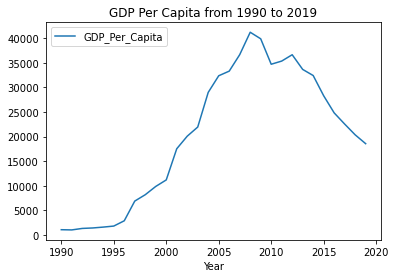

In [42]:
EG.plot (kind= 'line', y= 'GDP_Per_Capita', x='Year', title= 'GDP Per Capita from 1990 to 2019') #includes the years 1990

In [43]:
China = gdp_df.set_index('Country').loc['China'], gdp_df.set_index('Year').loc[[1990, 2017]]

In [44]:
China

(         Year  GDP_Per_Capita
 Country                      
 China    2019    16092.300767
 China    2018    15242.985858
 China    2017    14344.421239
 China    2016    13487.822482
 China    2015    12691.821553
 China    2014    11917.338496
 China    2013    11149.867559
 China    2012    10397.561415
 China    2011     9686.615290
 China    2010     8884.588031
 China    2009     8069.354638
 China    2008     7412.874363
 China    2007     6795.174012
 China    2006     5979.781712
 China    2005     5334.646639
 China    2004     4817.211845
 China    2003     4400.825183
 China    2002     4024.355697
 China    2001     3712.338132
 China    2000     3451.679231
 China    1999     3206.730026
 China    1998     3004.427342
 China    1997     2812.711135
 China    1996     2601.363426
 China    1995     2391.477116
 China    1994     2178.924057
 China    1993     1949.534268
 China    1992     1731.657215
 China    1991     1534.705272
 China    1990     1423.896348,
       

In [45]:
gdp_EG= gdp_df[gdp_df["Country"].isin(["Equatorial Guinea"])]

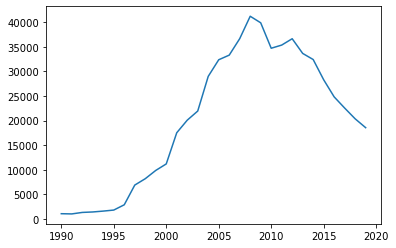

In [46]:
plt.plot(gdp_EG['Year'], gdp_EG['GDP_Per_Capita'])

In [47]:
gdp_china= gdp_df[gdp_df["Country"].isin(["China"])]

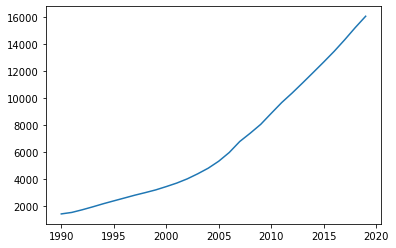

In [48]:
plt.plot(gdp_china['Year'], gdp_china['GDP_Per_Capita'])

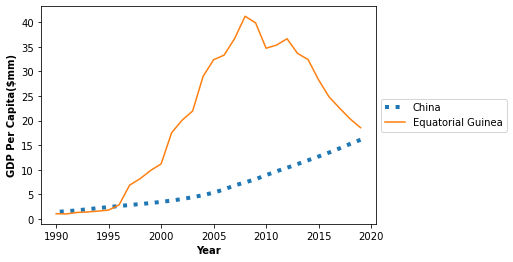

In [49]:
plt.plot(gdp_china['Year'], (gdp_china['GDP_Per_Capita']/1000), label='China', linestyle=':',linewidth=4 )
plt.plot(gdp_EG['Year'], (gdp_EG['GDP_Per_Capita']/1000), label='Equatorial Guinea')
plt.xlabel('Year',fontweight ='bold')
plt.ylabel('GDP Per Capita($mm)', fontweight ='bold')
plt.legend(bbox_to_anchor = (1, 0.5), loc = 'center left')

In [50]:
#China.plot (kind='line', y='GDP_Per_Capita', x='Year', title= 'GDP Per Capita from 1990 to 2019')

In [51]:
gdp_df[gdp_df['Year'] == 1990]  #gives us data with only 1990

,Country,Year,GDP_Per_Capita
47,Albania,1990,4842.734635
77,Algeria,1990,8746.352901
107,Angola,1990,5783.429064
137,Antigua and Barbuda,1990,15459.551675
167,Arab World,1990,9694.667544
...,...,...,...
6721,Vanuatu,1990,2888.309393
6751,Vietnam,1990,1673.249634
6807,World,1990,9680.269697
6837,Zambia,1990,2190.182814


In [52]:
 gdp_df[(gdp_df['Year'] == 2017) | (gdp_df['Year'] == 1990)] #gives us data with 1990 and 2017

,Country,Year,GDP_Per_Capita
2,Afghanistan,2017,2058.383832
20,Albania,2017,12811.759436
47,Albania,1990,4842.734635
50,Algeria,2017,11737.409353
77,Algeria,1990,8746.352901
...,...,...,...
6807,World,1990,9680.269697
6810,Zambia,2017,3485.005238
6837,Zambia,1990,2190.182814
6840,Zimbabwe,2017,3028.245976


18. Read in continents.csv contained in the data folder into a new dataframe called continents. We will be using this dataframe to add a new column to our dataset.

In [53]:
continents= pd.read_csv('../data/continents.csv')

In [54]:
continents.head()

,Continent,Country
0,Asia,Afghanistan
1,Europe,Albania
2,Africa,Algeria
3,Europe,Andorra
4,Africa,Angola


19. Merge gdp_df and continents. Keep only the countries that appear in both data frames. Save the result back to gdp_df.

In [55]:
gdp_df_revised= pd.merge(left = gdp_df,
         right = continents)
gdp_df_revised

,Country,Year,GDP_Per_Capita,Continent
0,Afghanistan,2019,2065.036398,Asia
1,Afghanistan,2018,2033.779002,Asia
2,Afghanistan,2017,2058.383832,Asia
3,Afghanistan,2016,2057.062164,Asia
4,Afghanistan,2015,2068.265904,Asia
...,...,...,...,...
5438,Zimbabwe,1994,3263.934978,Africa
5439,Zimbabwe,1993,3033.504852,Africa
5440,Zimbabwe,1992,3054.889178,Africa
5441,Zimbabwe,1991,3426.598094,Africa


20. Determine the number of countries per continent. Create a bar chart showing this.

In [56]:
continent=gdp_df_revised.groupby('Continent')['Country'].count() #number of countries per continent
continent

Continent
Africa           1428
Asia             1240
Europe           1290
North America     761
Oceania           394
South America     330
Name: Country, dtype: int64

In [57]:
#create a bar chart

21. Create a seaborn boxplot showing GDP per capita in 2014 split out by continent. What do you notice?

In [58]:
gdp_2014= gdp_df_revised.query('Year== 2014')
gdp_2014

,Country,Year,GDP_Per_Capita,Continent
5,Afghanistan,2014,2102.385234,Asia
23,Albania,2014,11623.866679,Europe
53,Algeria,2014,11512.705405,Africa
83,Angola,2014,8239.828837,Africa
113,Antigua and Barbuda,2014,18104.241470,North America
...,...,...,...,...
5302,Vanuatu,2014,3116.077025,Oceania
5332,Vietnam,2014,6098.489609,Asia
5362,West Bank and Gaza,2014,5967.073437,Asia
5388,Zambia,2014,3450.046561,Africa


<AxesSubplot:xlabel='Continent', ylabel='GDP_Per_Capita'>

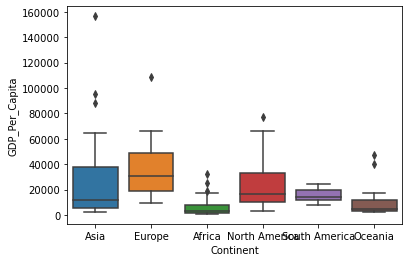

In [59]:
sns.boxplot(x=gdp_2014.Continent, y=gdp_2014.GDP_Per_Capita)


22. Read in internet_use.csv into a DataFrame called internet_df. You will most likely get an error message when doing this - figure out what is going wrong and fix it. Take a look at the first and last five rows and make any corrections to your read_csv() call to fix this. Again, do not modify the original datasets.

In [60]:
 internet_df = pd.read_csv('../data/internet_use.csv', header=0, nrows= 4495, dtype={'Year': 'Int64'}).dropna()

In [61]:
internet_df

,Country or Area,Year,Value,Value Footnotes
101,Antigua and Barbuda,2011,52.00,1.0
122,Argentina,2011,51.00,2.0
144,Armenia,2013,41.90,3.0
184,Australia,2013,83.00,4.0
185,Australia,2012,79.00,4.0
...,...,...,...,...
4309,Uruguay,2007,34.00,178.0
4368,Venezuela,2011,40.22,179.0
4369,Venezuela,2010,37.37,23.0
4370,Venezuela,2009,32.70,23.0


In [62]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 948 entries, 101 to 4454
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  948 non-null    object 
 1   Year             948 non-null    Int64  
 2   Value            948 non-null    float64
 3   Value Footnotes  948 non-null    float64
dtypes: Int64(1), float64(2), object(1)
memory usage: 38.0+ KB


In [63]:
internet_df.head(5)

,Country or Area,Year,Value,Value Footnotes
101,Antigua and Barbuda,2011,52.0,1.0
122,Argentina,2011,51.0,2.0
144,Armenia,2013,41.9,3.0
184,Australia,2013,83.0,4.0
185,Australia,2012,79.0,4.0


In [64]:
internet_df.tail(5)

,Country or Area,Year,Value,Value Footnotes
4309,Uruguay,2007,34.00,178.0
4368,Venezuela,2011,40.22,179.0
4369,Venezuela,2010,37.37,23.0
4370,Venezuela,2009,32.70,23.0
4454,Zambia,2011,11.50,180.0


23. Drop the Value Footnotes column and then rename the columns to ‘Country’, ‘Year’, and ‘Internet_Users_Pct’.



In [65]:
internet_df=internet_df.drop(columns=['Value Footnotes'])

In [66]:
internet_df=internet_df.rename(columns={'Country or Area':'Country', 'Value':'Internet_Users_Pct'})

In [67]:
internet_df

,Country,Year,Internet_Users_Pct
101,Antigua and Barbuda,2011,52.00
122,Argentina,2011,51.00
144,Armenia,2013,41.90
184,Australia,2013,83.00
185,Australia,2012,79.00
...,...,...,...
4309,Uruguay,2007,34.00
4368,Venezuela,2011,40.22
4369,Venezuela,2010,37.37
4370,Venezuela,2009,32.70


24. How many rows and columns does this new dataset have? What are the types of its columns? Ensure that the Internet_Users_Pct column is a numeric data type and fix it if it is not.

In [68]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 948 entries, 101 to 4454
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             948 non-null    object 
 1   Year                948 non-null    Int64  
 2   Internet_Users_Pct  948 non-null    float64
dtypes: Int64(1), float64(1), object(1)
memory usage: 30.6+ KB


In [69]:
internet_df.shape

(948, 3)

In [70]:
#internet_df['Internet_Users_Pct'].astype(float)

In [71]:
internet_df['Internet_Users_Pct'] = pd.to_numeric(internet_df['Internet_Users_Pct'], errors='coerce')

In [72]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 948 entries, 101 to 4454
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             948 non-null    object 
 1   Year                948 non-null    Int64  
 2   Internet_Users_Pct  948 non-null    float64
dtypes: Int64(1), float64(1), object(1)
memory usage: 30.6+ KB


25. What is the first year that has a nonzero internet users percentage reported? What is the general trend in internet users percentage over the years. Pick a visualization that you think illustrates this trend well.

In [73]:
internet_df[internet_df['Internet_Users_Pct']!=0] #2010 is the first year that has a non-zero internet users percentage reposrted

,Country,Year,Internet_Users_Pct
101,Antigua and Barbuda,2011,52.00
122,Argentina,2011,51.00
144,Armenia,2013,41.90
184,Australia,2013,83.00
185,Australia,2012,79.00
...,...,...,...
4309,Uruguay,2007,34.00
4368,Venezuela,2011,40.22
4369,Venezuela,2010,37.37
4370,Venezuela,2009,32.70


26. Merge gdp_df and internet_df (on Country and Year) into a single DataFrame named gdp_and_internet_use. Keep only countries and years that appear in both tables.
Difficult Bonus: Do not attempt this part until you have completed all other portions of the data question. Some countries have slightly different names in the internet use and gdp dataframes. For example, the Central African Republic is "Central African Republic" in the gdp dataframe and "Central African Rep." in the internet use dataframe. Find as many instances like this as you can and resolve them so that when merging you keep the maximum number of countries possible.

In [74]:
gdp_and_internet_use= pd.merge (right= gdp_df,
                               left= internet_df, on= ['Country', 'Year'])
gdp_and_internet_use

,Country,Year,Internet_Users_Pct,GDP_Per_Capita
0,Antigua and Barbuda,2011,52.0,17604.417102
1,Argentina,2011,51.0,24647.629275
2,Armenia,2013,41.9,10691.309955
3,Australia,2013,83.0,46960.050240
4,Australia,2012,79.0,46571.474558
...,...,...,...,...
807,Uruguay,2010,46.4,17712.896989
808,Uruguay,2009,41.8,16477.823860
809,Uruguay,2008,39.3,15851.796753
810,Uruguay,2007,34.0,14828.024360


In [75]:
#we can also use this code
gdp_and_internet_use= pd.merge (gdp_df, internet_df, on=['Country','Year']).dropna()
gdp_and_internet_use

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Antigua and Barbuda,2011,17604.417102,52.0
1,Argentina,2011,24647.629275,51.0
2,Armenia,2013,10691.309955,41.9
3,Australia,2013,46960.050240,83.0
4,Australia,2012,46571.474558,79.0
...,...,...,...,...
807,Uruguay,2010,17712.896989,46.4
808,Uruguay,2009,16477.823860,41.8
809,Uruguay,2008,15851.796753,39.3
810,Uruguay,2007,14828.024360,34.0


27. Look at the first five rows of your new data frame to confirm it merged correctly. Also, check the last five rows to make sure the data is clean and as expected.

In [76]:
gdp_and_internet_use.head(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Antigua and Barbuda,2011,17604.417102,52.0
1,Argentina,2011,24647.629275,51.0
2,Armenia,2013,10691.309955,41.9
3,Australia,2013,46960.050240,83.0
4,Australia,2012,46571.474558,79.0


In [77]:
gdp_and_internet_use.tail(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
807,Uruguay,2010,17712.896989,46.4
808,Uruguay,2009,16477.823860,41.8
809,Uruguay,2008,15851.796753,39.3
810,Uruguay,2007,14828.024360,34.0
811,Zambia,2011,3201.289398,11.5


28. Create a new DataFrame, named gdp_and_internet_use_2014 by extracting data for the year 2014 from gdp_and_internet_use. How many countries have at least 90% internet users in 2014?

In [78]:
gdp_and_internet_use_2014= gdp_and_internet_use [gdp_and_internet_use ['Year']==2014]
gdp_and_internet_use_2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
11,Austria,2014,53025.847608,81.00000
34,Bahrain,2014,48201.085018,90.99998
39,Belarus,2014,19066.886819,59.02000
48,Belgium,2014,48903.340742,85.00000
68,Bulgaria,2014,18807.228779,55.49000
107,Colombia,2014,13899.368829,52.57000
125,Croatia,2014,23858.410399,68.57000
135,Cyprus,2014,33064.580170,69.33000
146,Czech Republic,2014,34496.508048,79.71000
158,Denmark,2014,52214.537753,95.99000


In [79]:
gdp_and_internet_use_2014 [gdp_and_internet_use_2014 ['Internet_Users_Pct'] >= 90]

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
34,Bahrain,2014,48201.085018,90.99998
158,Denmark,2014,52214.537753,95.99000
215,Finland,2014,45013.100455,92.38000
309,Iceland,2014,49652.149500,98.16000
426,Luxembourg,2014,108760.916030,94.67000
511,Netherlands,2014,52353.666990,93.17000
529,Norway,2014,62589.373548,96.30000
711,Sweden,2014,49416.289877,92.52000
776,United Arab Emirates,2014,62378.657439,90.40000
783,United Kingdom,2014,44209.510472,91.61000


In [80]:
gdp_and_internet_use_2014 [gdp_and_internet_use_2014 ['Internet_Users_Pct'] >= 90].value_counts()

Country               Year  GDP_Per_Capita  Internet_Users_Pct
Bahrain               2014  48201.085018    90.99998              1
Denmark               2014  52214.537753    95.99000              1
Finland               2014  45013.100455    92.38000              1
Iceland               2014  49652.149500    98.16000              1
Luxembourg            2014  108760.916030   94.67000              1
Netherlands           2014  52353.666990    93.17000              1
Norway                2014  62589.373548    96.30000              1
Sweden                2014  49416.289877    92.52000              1
United Arab Emirates  2014  62378.657439    90.40000              1
United Kingdom        2014  44209.510472    91.61000              1
dtype: int64

In [81]:
#number of countries with at leats 90% internet users 
gdp_and_internet_use_2014 [gdp_and_internet_use_2014 ['Internet_Users_Pct'] >= 90].value_counts().sum()

10

29. Find the countries that had the top 3 largest GDP per capita figures for 2014. Create a seaborn FacetGrid showing the change in internet user percentage over time for these three countries. Each individual figure in the facet grid will represent a single country. What trends do you notice?

In [82]:
top_gdp=gdp_and_internet_use_2014.nlargest (3, 'GDP_Per_Capita')
top_gdp

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
426,Luxembourg,2014,108760.916030,94.67
640,Singapore,2014,87808.663157,82.00
724,Switzerland,2014,65813.952509,87.00


In [83]:
top_gdp=gdp_and_internet_use_2014.nlargest (3, 'GDP_Per_Capita')['Country'].values
top_gdp

array(['Luxembourg', 'Singapore', 'Switzerland'], dtype=object)

In [84]:
top3_GDP=['Luxembourg','Singapore', 'Switzerland']

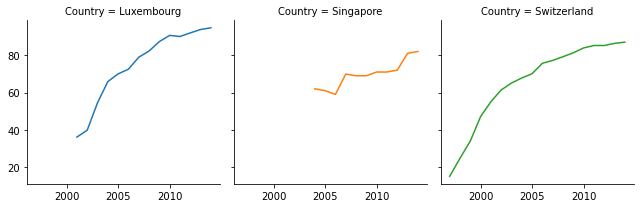

In [85]:
grid=sns.FacetGrid(data= gdp_and_internet_use[gdp_and_internet_use['Country'].isin(top_gdp)],col= 'Country', hue='Country')
grid.map_dataframe(sns.lineplot, x= 'Year', y='Internet_Users_Pct')

30. Create a scatter plot of Internet Use vs GDP per Capita for the year 2014. What do you notice?

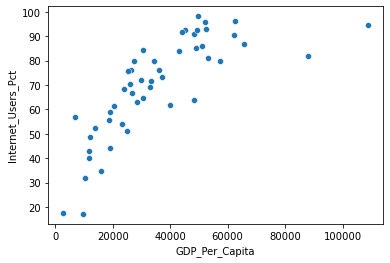

In [86]:
#as GDP per capita increases, so does internet use so there is a positive correlation between them.
sns.scatterplot(data=gdp_and_internet_use_2014, x= 'GDP_Per_Capita', y= 'Internet_Users_Pct');

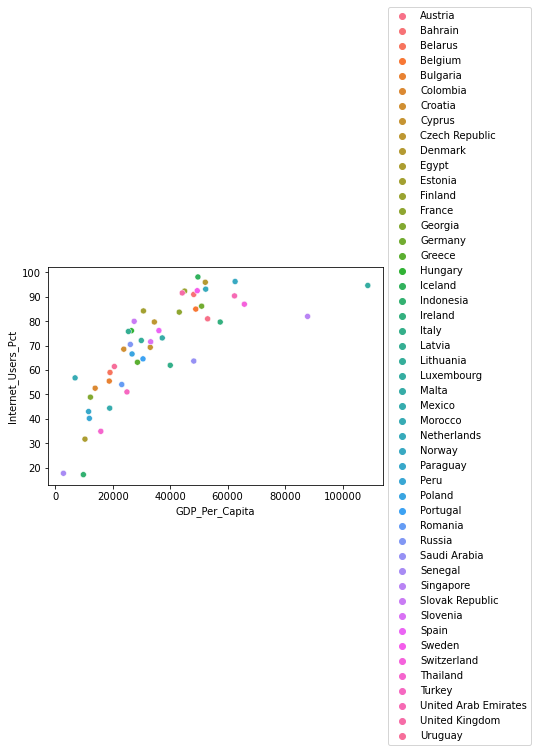

In [87]:
#scatterplot of GDP per country but this is terrible as you can't easily the plot.
sns.scatterplot(x= gdp_and_internet_use_2014 ['GDP_Per_Capita'],
               y= gdp_and_internet_use_2014 ['Internet_Users_Pct'],
               hue= gdp_and_internet_use_2014 ['Country']),
plt.legend(bbox_to_anchor = (1, 0.5), loc = 'center left');

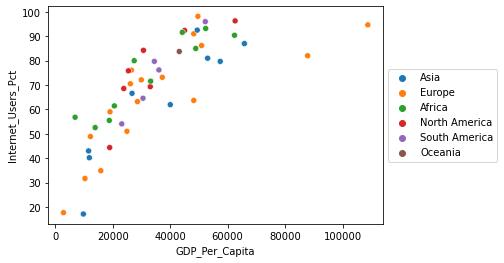

In [88]:
#scatterplot of GDP based on continent
sns.scatterplot(x= gdp_and_internet_use_2014 ['GDP_Per_Capita'],
               y= gdp_and_internet_use_2014 ['Internet_Users_Pct'],
               hue= gdp_df_revised ['Continent']),
plt.legend(bbox_to_anchor = (1, 0.5), loc = 'center left');

31. Find the correlation between GDP per Capita and Internet Use for the year 2014. What is the meaning of this number?

In [89]:
gdp_internet_corr=np.corrcoef(gdp_and_internet_use_2014 ['GDP_Per_Capita'], gdp_and_internet_use_2014 ['Internet_Users_Pct'])
gdp_internet_corr

array([[1.        , 0.76973335],
       [0.76973335, 1.        ]])

In [90]:
#another way of getting correlation 
gdp_internet_corr = gdp_and_internet_use_2014['GDP_Per_Capita'].corr(gdp_and_internet_use_2014['Internet_Users_Pct'])
gdp_internet_corr

0.769733349723148

32. Add a column to gdp_and_internet_use_2014 and calculate the logarithm of GDP per capita. Find the correlation between the log of GDP per capita and internet users percentage. How does this compare to the calculation in the previous part?

In [91]:
gdp_and_internet_use_2014 ['GDP_Per_Capita_Log']= np.log(gdp_and_internet_use_2014['GDP_Per_Capita'])
log_and_internet_corr= gdp_and_internet_use_2014['GDP_Per_Capita_Log'].corr(gdp_and_internet_use_2014['Internet_Users_Pct'])
log_and_internet_corr

<ipython-input-91-2b8d549c275e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_and_internet_use_2014 ['GDP_Per_Capita_Log']= np.log(gdp_and_internet_use_2014['GDP_Per_Capita'])


0.8697926470034938

33. Filter the original dataset down to just the United States for all available years. Calculate correlation between internet use and gdp per capita. Is this meaningful or useful?

In [92]:
US= gdp_and_internet_use [gdp_and_internet_use ['Country']== 'United States']
US

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
798,United States,2012,55632.929764,79.300000
799,United States,2011,54806.116927,69.729461
800,United States,2010,54359.133974,71.690000
801,United States,2009,53440.911538,71.000000
802,United States,2008,55314.660060,74.000000


In [93]:
np.corrcoef(US['GDP_Per_Capita'], US['Internet_Users_Pct'])

array([[1.      , 0.700703],
       [0.700703, 1.      ]])

In [94]:
#another way of getting the same results
us= gdp_and_internet_use.set_index('Country').loc['United States']

In [95]:
us_corr=us['GDP_Per_Capita'].corr(us['Internet_Users_Pct'])
us_corr

0.7007030033668123

# Solo Exploration and Presentation

Choose and download another data set from the UN data http://data.un.org/Explorer.aspx to merge with your data and explore. Prepare a short (< 5 minute) presentation of your findings. Report any interesting correlations you find. Include visualizations and consider adding interactivity with ipywidgets. This presentation can be done either in a Jupyter Notebook or using another presentation software, such as PowerPoint. Check out Jupyter Slides if you have time. This allows you to turn your jupyter notebook into a slideshow.

In [96]:
refugee=pd.read_csv('../data/refugees.csv',skipfooter=3, engine='python', dtype={'Year':'Int64', 'Refugees assisted by UNHCR':'Int64'}).dropna()

In [97]:
refugee.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27705 entries, 0 to 78024
Data columns (total 7 columns):
 #   Column                                                                  Non-Null Count  Dtype  
---  ------                                                                  --------------  -----  
 0   Country or territory of asylum or residence                             27705 non-null  object 
 1   Country or territory of origin                                          27705 non-null  object 
 2   Year                                                                    27705 non-null  Int64  
 3   Refugees<sup>*</sup>                                                    27705 non-null  float64
 4   Refugees assisted by UNHCR                                              27705 non-null  Int64  
 5   Total refugees and people in refugee-like situations<sup>**</sup>       27705 non-null  float64
 6   Total refugees and people in refugee-like situations assisted by UNHCR  27705 n

In [98]:
refugee.head()

,Country or territory of asylum or residence,Country or territory of origin,Year,Refugees<sup>*</sup>,Refugees assisted by UNHCR,Total refugees and people in refugee-like situations<sup>**</sup>,Total refugees and people in refugee-like situations assisted by UNHCR
0,Afghanistan,Iraq,2016,1.0,1,1.0,1.0
1,Afghanistan,Islamic Rep. of Iran,2016,33.0,33,33.0,33.0
2,Afghanistan,Pakistan,2016,59737.0,59737,59737.0,59737.0
3,Albania,China,2016,11.0,11,11.0,11.0
4,Albania,Dem. Rep. of the Congo,2016,3.0,3,3.0,3.0


In [99]:
refugees=refugee.drop(columns={'Refugees<sup>*</sup>','Total refugees and people in refugee-like situations<sup>**</sup>', 'Total refugees and people in refugee-like situations assisted by UNHCR'})

In [100]:
refugees=refugees.rename(columns={'Country or territory of asylum or residence': 'Country_residence', 'Country or territory of origin': 'Country_origin', 'Refugees assisted by UNHCR': 'Refugees'})

In [101]:
refugees.head()

,Country_residence,Country_origin,Year,Refugees
0,Afghanistan,Iraq,2016,1
1,Afghanistan,Islamic Rep. of Iran,2016,33
2,Afghanistan,Pakistan,2016,59737
3,Albania,China,2016,11
4,Albania,Dem. Rep. of the Congo,2016,3


In [102]:
refugees.groupby("Year").sum()

,Refugees
Year,
1999,6875583
2000,6853391
2001,6757909
2002,5661900
2003,5129481
2004,5285528
2005,4623637
2006,4473997
2007,4499966


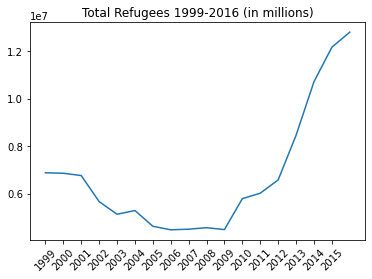

In [103]:
plt.plot(refugees.groupby("Year").sum())
plt.xticks(ticks= [1999, 2000, 2001, 2002,2003, 2004,2005,2006,2007,2008,2009, 2010,2011, 2012,2013,2014, 2015], rotation=45)
plt.title("Total Refugees 1999-2016 (in millions)")
print()

<AxesSubplot:title={'center':'Total Refugees 1999-2016 (in millions)'}, xlabel='Year'>

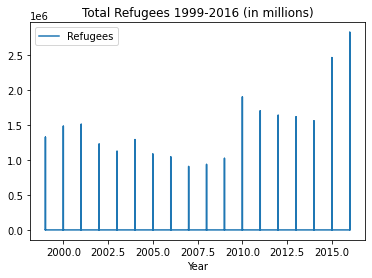

In [104]:
refugees.plot (kind= 'line', y= 'Refugees', x='Year', title= 'Total Refugees 1999-2016 (in millions)')

In [105]:
refugees.groupby('Country_origin')['Refugees'].sum().head(10)


Country_origin
Afghanistan    41986443
Albania             379
Algeria            2526
Angola          1338672
Argentina           163
Armenia           10977
Azerbaijan       337630
Bahrain             116
Bangladesh          904
Belarus            1520
Name: Refugees, dtype: Int64

In [106]:
country=refugees.groupby('Country_origin')['Refugees'].sum().sort_values(ascending=False).head(18)
country

Country_origin
Afghanistan               41986443
Syrian Arab Rep.          16090085
Somalia                    9844637
Sudan                      8791386
Dem. Rep. of the Congo     6420032
Iraq                       3816975
Burundi                    3739465
Myanmar                    3119989
South Sudan                2991069
Eritrea                    2635398
Central African Rep.       2604724
Liberia                    2005375
Croatia                    1985151
Western Sahara             1865080
Bhutan                     1367315
Angola                     1338672
Bosnia and Herzegovina     1192639
Sierra Leone               1070595
Name: Refugees, dtype: Int64

In [107]:
Afghanistan= refugees.set_index('Country_origin').loc['Afghanistan']
Afghanistan

,Country_residence,Year,Refugees
Country_origin,,,
Afghanistan,Algeria,2016,2
Afghanistan,Argentina,2016,5
Afghanistan,Azerbaijan,2016,562
Afghanistan,Belarus,2016,83
Afghanistan,Brazil,2016,35
...,...,...,...
Afghanistan,Tajikistan,1999,754
Afghanistan,Thailand,1999,22
Afghanistan,Turkey,1999,26


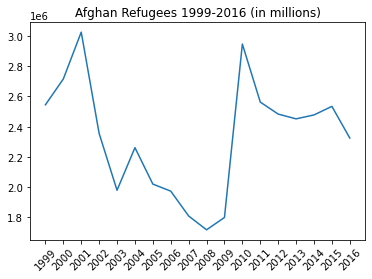

In [108]:
plt.plot(Afghanistan.groupby("Year").sum())
plt.xticks(ticks= [1999,2000,2001, 2002,2003,2004,2005,2006, 2007,2008,2009,2010,2011, 2012,2013,2014,2015, 2016], rotation=45)
plt.title("Afghan Refugees 1999-2016 (in millions)")
print()

In [109]:
refugees[refugees["Country_origin"] == "Afghanistan"].groupby("Year").sum()


,Refugees
Year,
1999,2544816
2000,2715760
2001,3025305
2002,2355447
2003,1979673
2004,2261423
2005,2020556
2006,1973948
2007,1809563


In [110]:
Iran=refugees[refugees["Country_origin"] == "Islamic Rep. of Iran"].groupby("Year").sum()
Iran


,Refugees
Year,
1999,27007
2000,26434
2001,26063
2002,22620
2003,12170
2004,12151
2005,15777
2006,14353
2007,14120


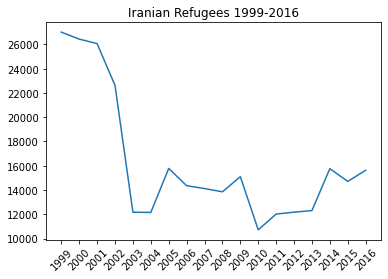

In [111]:
plt.plot(Iran.groupby("Year").sum())
plt.xticks(ticks= [1999,2000,2001, 2002,2003,2004,2005,2006, 2007,2008,2009,2010,2011, 2012,2013,2014,2015, 2016], rotation=45)
plt.title("Iranian Refugees 1999-2016")
print()

In [112]:
Syria=refugees[refugees["Country_origin"] == "Syrian Arab Rep."].groupby("Year").sum()
Syria

,Refugees
Year,
1999,44
2000,144
2001,171
2002,190
2003,773
2004,688
2005,805
2006,891
2007,883


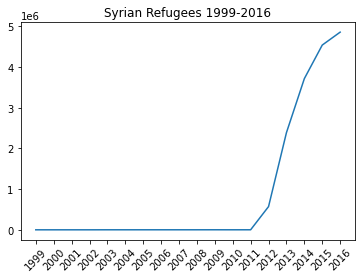

In [113]:
plt.plot(Syria.groupby("Year").sum())
plt.xticks(ticks= [1999,2000,2001, 2002,2003,2004,2005,2006, 2007,2008,2009,2010,2011, 2012,2013,2014,2015, 2016], rotation=45)
plt.title("Syrian Refugees 1999-2016")
print()

In [136]:
refugees_pivoted= pd.pivot_table(refugees[refugees['Year'].isin([1999, 2016])], 
                            values=['Refugees'], 
                            index=['Country_origin'], 
                            columns=['Year'], dropna=True).dropna(0)

In [115]:
refugees_pivoted

Refugees            
Year                                        1999        2016
Country_origin                                              
Afghanistan                         87752.275862   41518.625
Algeria                                     18.1    3.526316
Angola                                    6676.0   49.421053
Argentina                               5.333333         1.0
Armenia                                   1721.2         6.0
...                                          ...         ...
Venezuela (Bolivarian Republic of)           1.0   34.636364
Viet Nam                               18400.875   47.142857
Western Sahara                             829.0     22518.0
Yemen                                     365.75  388.763158
Zambia                                       7.0         1.0

[102 rows x 2 columns]

In [133]:
refugees_pivoted2= pd.pivot_table(refugees[refugees['Country_origin'].isin(['Afghanistan', 'Syrian Arab Rep.', 'Islamic Rep. of Iran'])], 
                            values=['Refugees'], 
                            index=['Country_origin'], 
                            columns=['Year'], dropna=True).dropna(0)
refugees_pivoted2

Refugees                                            \
Year                          1999          2000          2001          2002   
Country_origin                                                                 
Afghanistan           87752.275862  73398.918919  70355.930233  52343.266667   
Islamic Rep. of Iran    818.393939    714.432432    635.682927    611.351351   
Syrian Arab Rep.               5.5      7.578947           9.5     14.615385   

                                                                            \
Year                          2003          2004          2005        2006   
Country_origin                                                               
Afghanistan           43036.369565  53843.404762  51809.128205     51946.0   
Islamic Rep. of Iran    296.829268    264.152174    415.184211  368.025641   
Syrian Arab Rep.             38.65          34.4     38.333333       35.64   

                                                                              \
Year                          2007          2008          2009          2010   
Country_origin                                                                 
Afghanistan           43084.833333  46436.621622  51423.914286  77539.868421   
Islamic Rep. of Iran    336.190476    329.785714    359.452381    249.302326   
Syrian Arab Rep.          27.59375          35.0         57.65          34.0   

                                                                            \
Year                          2011          2012        2013          2014   
Country_origin                                                               
Afghanistan           58247.772727  52839.404255    49038.12  45049.345455   
Islamic Rep. of Iran    279.465116    270.555556  251.163265    335.297872   
Syrian Arab Rep.         29.642857  15433.783784    39821.25  52367.042254   

                                                  
Year                          2015          2016  
Country_origin                                    
Afghanistan           44463.649123     41518.625  
Islamic Rep. of Iran    288.411765    306.372549  
Syrian Arab Rep.      54734.084337  55869.873563

In [117]:
refugees['Year'].min()

1999

In [118]:
refugees['Year'].max()

2016

In [119]:
refugees['Country_origin'].value_counts(ascending=False)

Somalia                   1100
Iraq                      1009
Dem. Rep. of the Congo    1008
Sudan                     1003
Ethiopia                   862
                          ... 
Seychelles                   1
Tonga                        1
Qatar                        1
Belize                       1
Slovakia                     1
Name: Country_origin, Length: 160, dtype: int64

In [120]:
list(refugees["Country_origin"].value_counts()[refugees["Country_origin"].value_counts()[:] >= 1000].index)

['Somalia', 'Iraq', 'Dem. Rep. of the Congo', 'Sudan']

In [121]:
refugees.groupby('Country_origin')['Country_residence'].value_counts()

Country_origin  Country_residence      
Afghanistan     Azerbaijan                 18
                Belarus                    18
                India                      18
                Indonesia                  18
                Islamic Rep. of Iran       18
                                           ..
Zimbabwe        Hong Kong SAR, China        1
                Ireland                     1
                Slovenia                    1
                Somalia                     1
                United Rep. of Tanzania     1
Name: Country_residence, Length: 3772, dtype: int64

In [122]:
Iran=refugees.set_index('Country_origin').loc['Islamic Rep. of Iran']


In [124]:
refugees.set_index('Country_origin').loc['Afghanistan']

,Country_residence,Year,Refugees
Country_origin,,,
Afghanistan,Algeria,2016,2
Afghanistan,Argentina,2016,5
Afghanistan,Azerbaijan,2016,562
Afghanistan,Belarus,2016,83
Afghanistan,Brazil,2016,35
...,...,...,...
Afghanistan,Tajikistan,1999,754
Afghanistan,Thailand,1999,22
Afghanistan,Turkey,1999,26


In [125]:
refugees[refugees['Year']==2016].groupby('Country_origin').sum()

,Year,Refugees
Country_origin,,
Afghanistan,112896,2325043
Algeria,38304,67
Angola,38304,939
Argentina,2016,1
Armenia,16128,48
...,...,...
Viet Nam,14112,330
Western Sahara,8064,90072
Yemen,76608,14773


In [126]:
refugees[refugees['Year']==2016].groupby('Country_origin')['Refugees'].sum()

Country_origin
Afghanistan       2325043
Algeria                67
Angola                939
Argentina               1
Armenia                48
                   ...   
Viet Nam              330
Western Sahara      90072
Yemen               14773
Zambia                  5
Zimbabwe              774
Name: Refugees, Length: 133, dtype: Int64

In [138]:
refugees[refugees['Year']==2016].groupby(['Country_origin', 'Year']).sum().sort_values('Refugees', ascending=False)

,,Refugees
Country_origin,Year,
Syrian Arab Rep.,2016,4860679
Afghanistan,2016,2325043
South Sudan,2016,1395404
Somalia,2016,732029
Sudan,2016,609284
...,...,...
Costa Rica,2016,1
Fiji,2016,1
Romania,2016,1


In [140]:
top3=refugees[refugees['Year']==2016].groupby(['Country_origin', 'Year']).sum().sort_values('Refugees', ascending=False).head(3)
top3

,,Refugees
Country_origin,Year,
Syrian Arab Rep.,2016,4860679
Afghanistan,2016,2325043
South Sudan,2016,1395404


<AxesSubplot:xlabel='Country_origin,Year'>

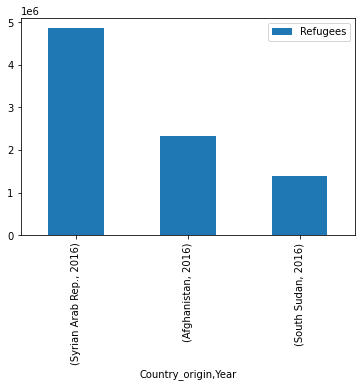

In [167]:
top3.plot(kind='bar')

In [128]:
refugees.groupby(['Country_origin', 'Year']).sum().sort_values('Refugees', ascending=False)

Refugees
Country_origin   Year          
Syrian Arab Rep. 2016   4860679
                 2015   4542929
                 2014   3718060
Afghanistan      2001   3025305
                 2010   2946515
...                         ...
Paraguay         2014         1
Costa Rica       2016         1
Swaziland        2006         1
                 2005         1
Mozambique       2007         1

[2282 rows x 1 columns]

In [129]:
refugees[refugees['Year']==2016].groupby(['Country_origin', 'Year']).sum().sort_values('Refugees', ascending=False).tail(5)

,,Refugees
Country_origin,Year,
Costa Rica,2016,1
Fiji,2016,1
Romania,2016,1
Qatar,2016,1
Portugal,2016,1


In [130]:
refugees.set_index('Country_origin').loc['Syrian Arab Rep.']

,Country_residence,Year,Refugees
Country_origin,,,
Syrian Arab Rep.,Albania,2016,3
Syrian Arab Rep.,Anguilla,2016,1
Syrian Arab Rep.,Antigua and Barbuda,2016,4
Syrian Arab Rep.,Argentina,2016,6
Syrian Arab Rep.,Armenia,2016,626
...,...,...,...
Syrian Arab Rep.,Jordan,1999,1
Syrian Arab Rep.,Malta,1999,1
Syrian Arab Rep.,Peru,1999,3


In [165]:
refugees.groupby(['Country_origin','Year']).count()

Country_residence  Refugees
Country_origin Year                             
Afghanistan    1999                 29        29
               2000                 37        37
               2001                 43        43
               2002                 45        45
               2003                 46        46
...                                ...       ...
Zimbabwe       2012                 17        17
               2013                 15        15
               2014                 14        14
               2015                 12        12
               2016                 10        10

[2282 rows x 2 columns]

In [156]:
list(refugees["Country_origin"].value_counts()[refugees["Country_origin"].value_counts()[:] >= 1000].index)

['Somalia', 'Iraq', 'Dem. Rep. of the Congo', 'Sudan']

In [158]:
from ipywidgets import interact, FloatSlider, IntSlider

In [163]:
@interact(x = ['Country_origin', 'Year', 'Refugees'])
def make_box(x):
   sns.boxplot(data = refugees, x = 'Country_origin', y = 'Refugees')

interactive(children=(Dropdown(description='x', options=('Country_origin', 'Year', 'Refugees'), value='Country…